<a href="https://colab.research.google.com/github/pAbhit007/100Days2ML/blob/main/Placements.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Importing Libraries

In [1]:
import numpy as np
import pandas as pd


# Loading Data

In [2]:
df = pd.read_csv('/content/placement.csv')

In [3]:
df.head()

,Unnamed: 0,cgpa,iq,placement
0,0,6.8,123.0,1
1,1,5.9,106.0,0
2,2,5.3,121.0,0
3,3,7.4,132.0,1
4,4,5.8,142.0,0


In [4]:
df.shape

(100, 4)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   cgpa       100 non-null    float64
 1   iq         100 non-null    float64
 2   placement  100 non-null    int64  
dtypes: float64(2), int64(1)
memory usage: 2.5 KB


# Preprocessing

In [5]:
df =df.iloc[:,1:]

In [10]:
df.head()

,cgpa,iq,placement
0,6.8,123.0,1
1,5.9,106.0,0
2,5.3,121.0,0
3,7.4,132.0,1
4,5.8,142.0,0


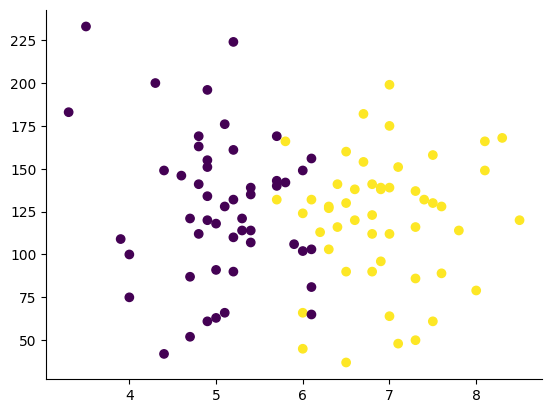

In [15]:
# @title cgpa vs iq

from matplotlib import pyplot as plt
plt.scatter(df['cgpa'],df['iq'],c=df['placement'])
plt.gca().spines[['top', 'right',]].set_visible(False)

Extracting Input and Output

In [21]:
X = df.iloc[:,0:2]
y = df.iloc[:,-1]

In [22]:
X.shape


(100, 2)

In [23]:
y.shape

(100,)

# Train


In [42]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size = 0.1)

In [43]:
X_train

,cgpa,iq
42,7.6,89.0
0,6.8,123.0
81,5.4,107.0
36,5.7,140.0
32,7.0,139.0
...,...,...
48,6.6,138.0
22,4.9,120.0
60,6.9,139.0
34,4.8,163.0


In [44]:
y_train

42    1
0     1
81    0
36    0
32    1
     ..
48    1
22    0
60    1
34    0
14    0
Name: placement, Length: 90, dtype: int64

In [45]:
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
X_train = scaler.fit_transform(X_train)

In [48]:
X_train

array([[ 1.42264827, -0.80509194],
       [ 0.70028808,  0.06084175],
       [-0.56384226, -0.34665646],
       [-0.29295719,  0.49380859],
       [ 0.88087813,  0.46833995],
       [-0.20266217,  1.15599317],
       [-1.01531738,  0.34099676],
       [-0.74443231,  1.02864998],
       [ 0.7905831 , -0.62681147],
       [-0.11236714, -0.3721251 ],
       [ 1.1517632 ,  0.41740267],
       [-1.19590743, -0.85602921],
       [ 0.429403  , -2.1294611 ],
       [-1.55708753,  2.02192685],
       [ 2.23530349, -0.01556417],
       [ 0.88087813,  1.38521091],
       [-1.91826763, -0.29571918],
       [-0.65413729,  0.00990447],
       [ 1.78382837, -1.05977831],
       [ 0.33910798,  0.51927722],
       [-0.02207212,  0.08631038],
       [ 0.06822291,  0.90130679],
       [-1.19590743, -1.74743153],
       [-0.65413729, -0.16837599],
       [ 2.05471344,  1.20693044],
       [ 1.1517632 , -0.11743872],
       [-1.19590743,  0.00990447],
       [ 0.60999305,  1.56349137],
       [-0.74443231,

# TEST

In [49]:
X_test = scaler.fit_transform(X_test)

In [50]:
from sklearn.linear_model import LogisticRegression

In [51]:
clf =LogisticRegression()

In [52]:
clf.fit(X_train,y_train)

LogisticRegression()

In [53]:
y_pred = clf.predict(X_test)

In [54]:
y_test

49    0
12    0
33    0
86    0
65    1
67    0
37    1
92    0
15    0
50    0
Name: placement, dtype: int64

# metrics

In [55]:
from sklearn.metrics import accuracy_score

In [56]:
accuracy_score(y_test,y_pred)

0.9

# MODEL REPRESENTATION

In [57]:
from mlxtend.plotting import plot_decision_regions

<Axes: >

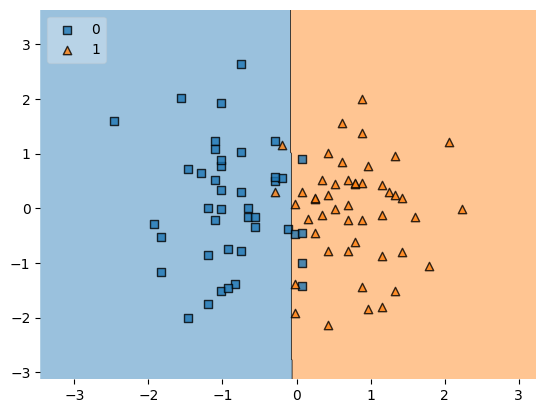

In [58]:
plot_decision_regions(X_train,y_train.values,clf=clf,legend=2)